<a href="https://colab.research.google.com/github/DanilaMalkin/statistick_analysis/blob/main/PSA_modul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем все необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Визуализируем наши данные

# 1 Предварительный анализ данных

Построение "Ящика с усами" для исходных данных

<ipython-input-201-695748d42589>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  csv_data['GDP PPP Per Capita'] = csv_data['GDP PPP Per Capita'].str.replace(' ', '').str.replace('$', '').astype(float)


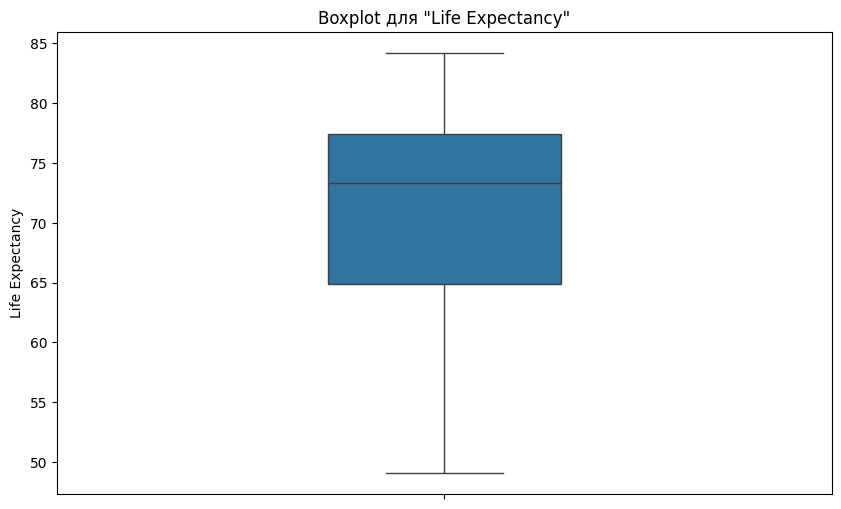

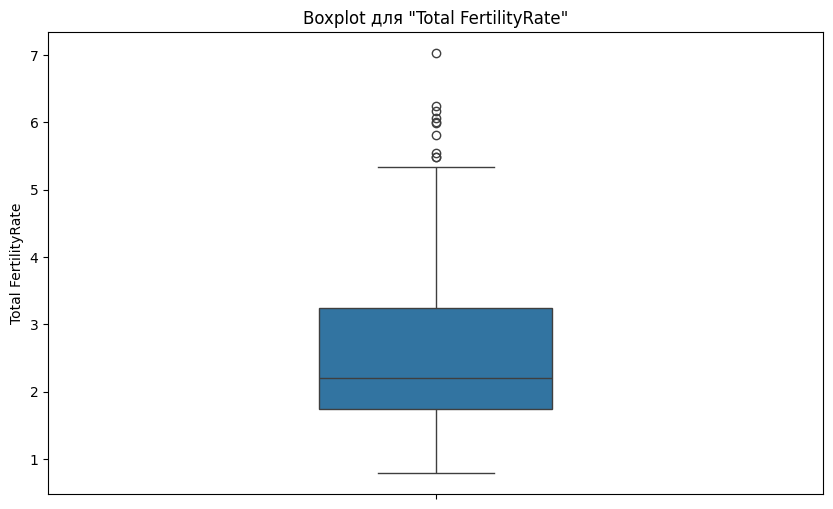

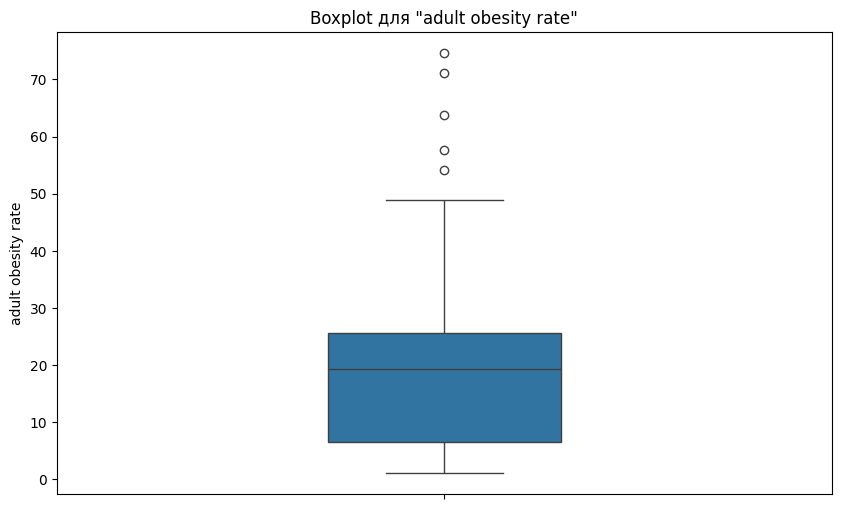

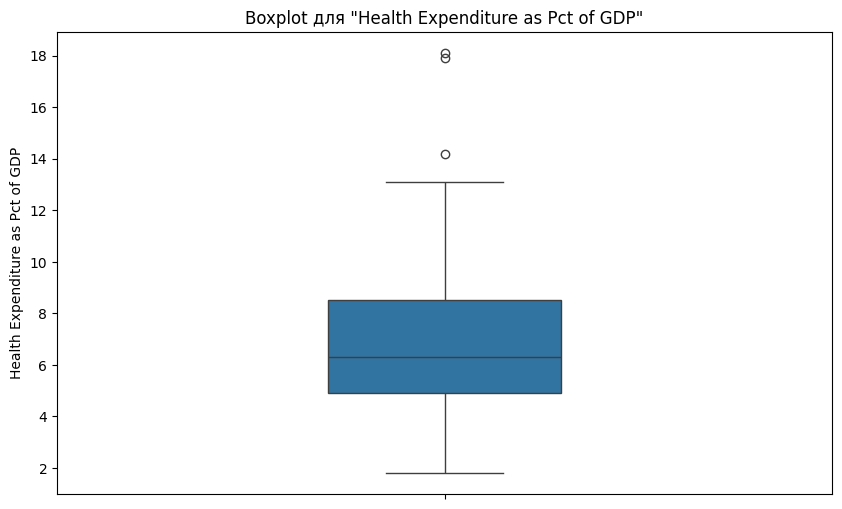

In [ ]:
# Преобразуем другие выбранные переменные в числовой формат для анализа
csv_path = '/content/ПСА_исслед.csv'
csv_data = pd.read_csv(csv_path, delimiter=';')

csv_data['Life Expectancy'] = csv_data['Life Expectancy'].str.replace(',', '.').astype(float)
csv_data['Total FertilityRate'] = csv_data['Total FertilityRate'].str.replace(',', '.').astype(float)
csv_data['adult obesity rate'] = csv_data['adult obesity rate'].str.replace(',', '.').astype(float)
csv_data['Health Expenditure as Pct of GDP'] = csv_data['Health Expenditure as Pct of GDP'].str.replace(',', '.').astype(float)
csv_data['GDP PPP Per Capita'] = csv_data['GDP PPP Per Capita'].str.replace(' ', '').str.replace('$', '').astype(float)

# Создаем список для итерации
columns = [ 'Life Expectancy', 'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP']

# Подготовка графиков

for col in columns:
    # Создаем новую фигуру и оси для каждой переменной
    fig, ax = plt.subplots(figsize=(10, 6))

    # Ящичковая диаграмма (Boxplot)
    sns.boxplot(data=csv_data, y=col, width=0.3)
    ax.set_title(f'Boxplot для "{col}"')
    ax.set_ylabel(col)

    plt.show()


повтроим тоже самое для очищенными данных

<ipython-input-202-db654b7a7760>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  csv_data['GDP PPP Per Capita'] = csv_data['GDP PPP Per Capita'].str.replace(' ', '').str.replace('$', '').astype(float)


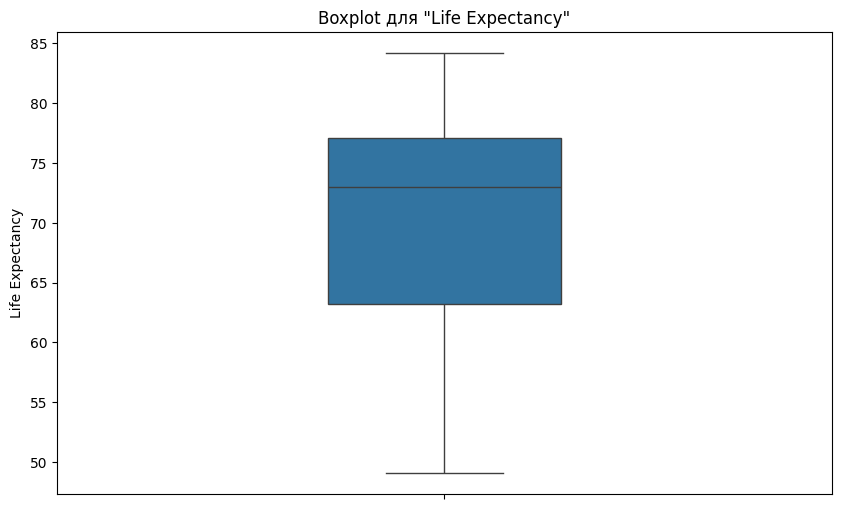

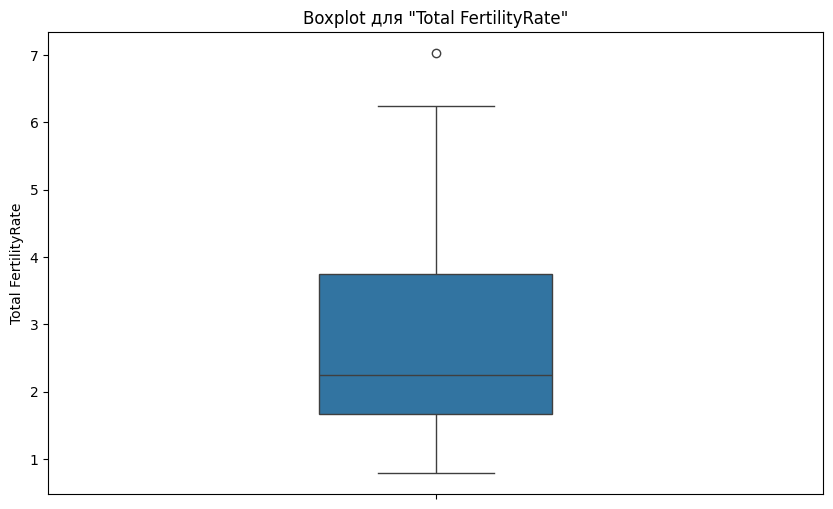

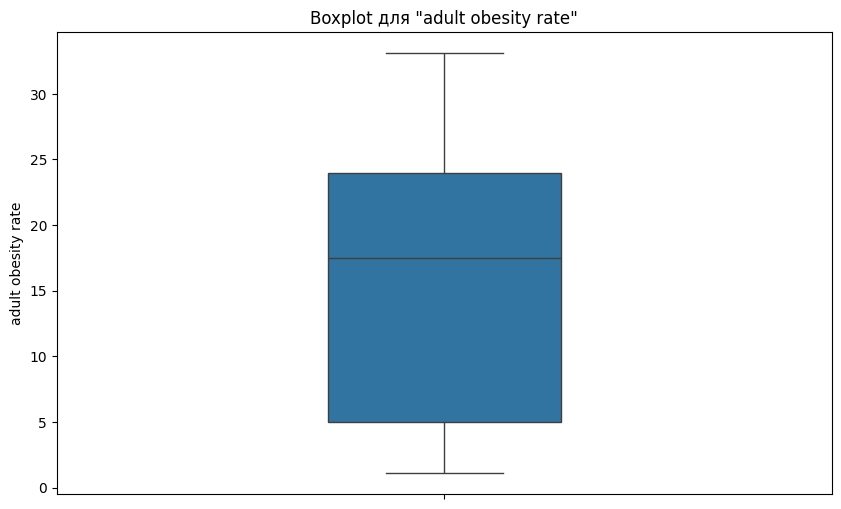

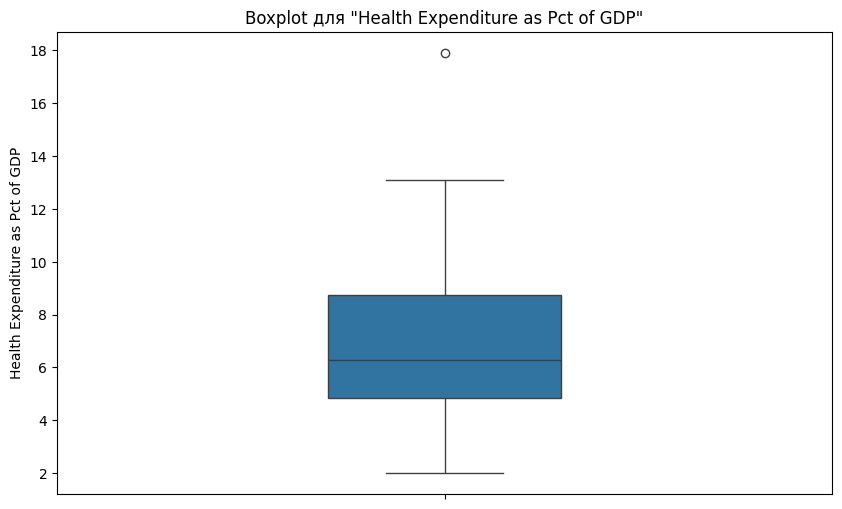

In [ ]:
csv_path = '/content/ПСА_исслед_Tota.csv'
csv_data = pd.read_csv(csv_path, delimiter=';')

# Преобразуем другие выбранные переменные в числовой формат для анализа

csv_data['Life Expectancy'] = csv_data['Life Expectancy'].str.replace(',', '.').astype(float)
csv_data['Total FertilityRate'] = csv_data['Total FertilityRate'].str.replace(',', '.').astype(float)
csv_data['adult obesity rate'] = csv_data['adult obesity rate'].str.replace(',', '.').astype(float)
csv_data['Health Expenditure as Pct of GDP'] = csv_data['Health Expenditure as Pct of GDP'].str.replace(',', '.').astype(float)
csv_data['GDP PPP Per Capita'] = csv_data['GDP PPP Per Capita'].str.replace(' ', '').str.replace('$', '').astype(float)

# Создаем список для итерации
columns = [ 'Life Expectancy', 'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP']

# Подготовка графиков

for col in columns:
    # Создаем новую фигуру и оси для каждой переменной
    fig, ax = plt.subplots(figsize=(10, 6))

    # Ящичковая диаграмма (Boxplot)
    sns.boxplot(data=csv_data, y=col, width=0.3)
    ax.set_title(f'Boxplot для "{col}"')
    ax.set_ylabel(col)

    plt.show()

Файл успешно загружен. В нем содержится информация о различных аспектах стран по данным CIA World Factbook 2013. Всего в файле представлены данные по 198 странам и 15 показателям.



---






# 1 c d e f g h

Анализ статистических характеристик для выбранных переменных

In [ ]:
csv_data['Infant Mortality Rate'] = pd.to_numeric(csv_data['Infant Mortality Rate'].str.replace(',', '.'), errors='coerce')
csv_data['Life Expectancy'] = csv_data['Life Expectancy'].replace(',', '.').astype(float)
csv_data['Total FertilityRate'] = csv_data['Total FertilityRate'].replace(',', '.').astype(float)
csv_data['adult obesity rate'] = csv_data['adult obesity rate'].replace(',', '.').astype(float)
csv_data['Health Expenditure as Pct of GDP'] = csv_data['Health Expenditure as Pct of GDP'].replace(',', '.').astype(float)
csv_data['GDP PPP Per Capita'] = pd.to_numeric(csv_data['GDP PPP Per Capita'].replace(' ', '').replace('$', ''), errors='coerce')


selected_columns = ['Infant Mortality Rate', 'Life Expectancy', 'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP','GDP PPP Per Capita']

# Определение функции для расчета статистических характеристик для выбранной переменной
def calculate_statistics(data, column_name):
    # Характеристики положения
    mean = data[column_name].mean()
    median = data[column_name].median()
    mode = data[column_name].mode()[0] if not data[column_name].mode().empty else "No mode"

    # Характеристики разброса
    range_var = data[column_name].max() - data[column_name].min()
    std_dev = data[column_name].std()
    variance = std_dev**2
    cv = (std_dev / mean) * 100 if mean else 0  # Коэффициент вариации

    # Ранговые характеристики
    quartiles = data[column_name].quantile([0.25, 0.5, 0.75])
    deciles = data[column_name].quantile([i/10 for i in range(1, 10)])

    # Z-преобразование и расчет межквартильного размаха (IQR)
    iqr = quartiles[0.75] - quartiles[0.25]
    iqr_1_5 = 1.5 * iqr
    iqr_3 = 3 * iqr
    three_sigma_rule = [mean - 3*std_dev, mean + 3*std_dev]

    # Сбор результатов
    stats = {
        'mean': mean,
        'median': median,
        'mode': mode,
        'range_var': range_var,
        'cv': cv,
        'variance': variance,
        'std_dev': std_dev,
        'quartiles': quartiles,
        'deciles': deciles,
        'iqr': iqr,
        'iqr_1_5': iqr_1_5,
        'iqr_3': iqr_3,
        'three_sigma_rule': three_sigma_rule
    }

    return stats

# Проведение расчетов для выбранных переменных
statistics_results = {}
for column in selected_columns:
    statistics_results[column] = calculate_statistics(csv_data, column)

statistics_results


{'Infant Mortality Rate': {'mean': 30.60435114503817,
  'median': 20.51,
  'mode': 3.67,
  'range_var': 117.24,
  'cv': 88.62058139550587,
  'variance': 735.5895355372872,
  'std_dev': 27.12175391705498,
  'quartiles': 0.25     7.19
  0.50    20.51
  0.75    47.79
  Name: Infant Mortality Rate, dtype: float64,
  'deciles': 0.1     3.80
  0.2     5.90
  0.3    10.44
  0.4    15.41
  0.5    20.51
  0.6    27.25
  0.7    42.15
  0.8    56.13
  0.9    72.45
  Name: Infant Mortality Rate, dtype: float64,
  'iqr': 40.6,
  'iqr_1_5': 60.900000000000006,
  'iqr_3': 121.80000000000001,
  'three_sigma_rule': [-50.760910606126785, 111.96961289620312]},
 'Life Expectancy': {'mean': 70.00526717557254,
  'median': 72.98,
  'mode': 73.03,
  'range_var': 35.12,
  'cv': 13.364780051465974,
  'variance': 87.53567127422195,
  'std_dev': 9.356049982456376,
  'quartiles': 0.25    63.24
  0.50    72.98
  0.75    77.09
  Name: Life Expectancy, dtype: float64,
  'deciles': 0.1    54.55
  0.2    60.67
  0.3   

# 2 Корреляционный анализ

# a. Построение полей корреляции для исследования связи между переменными.

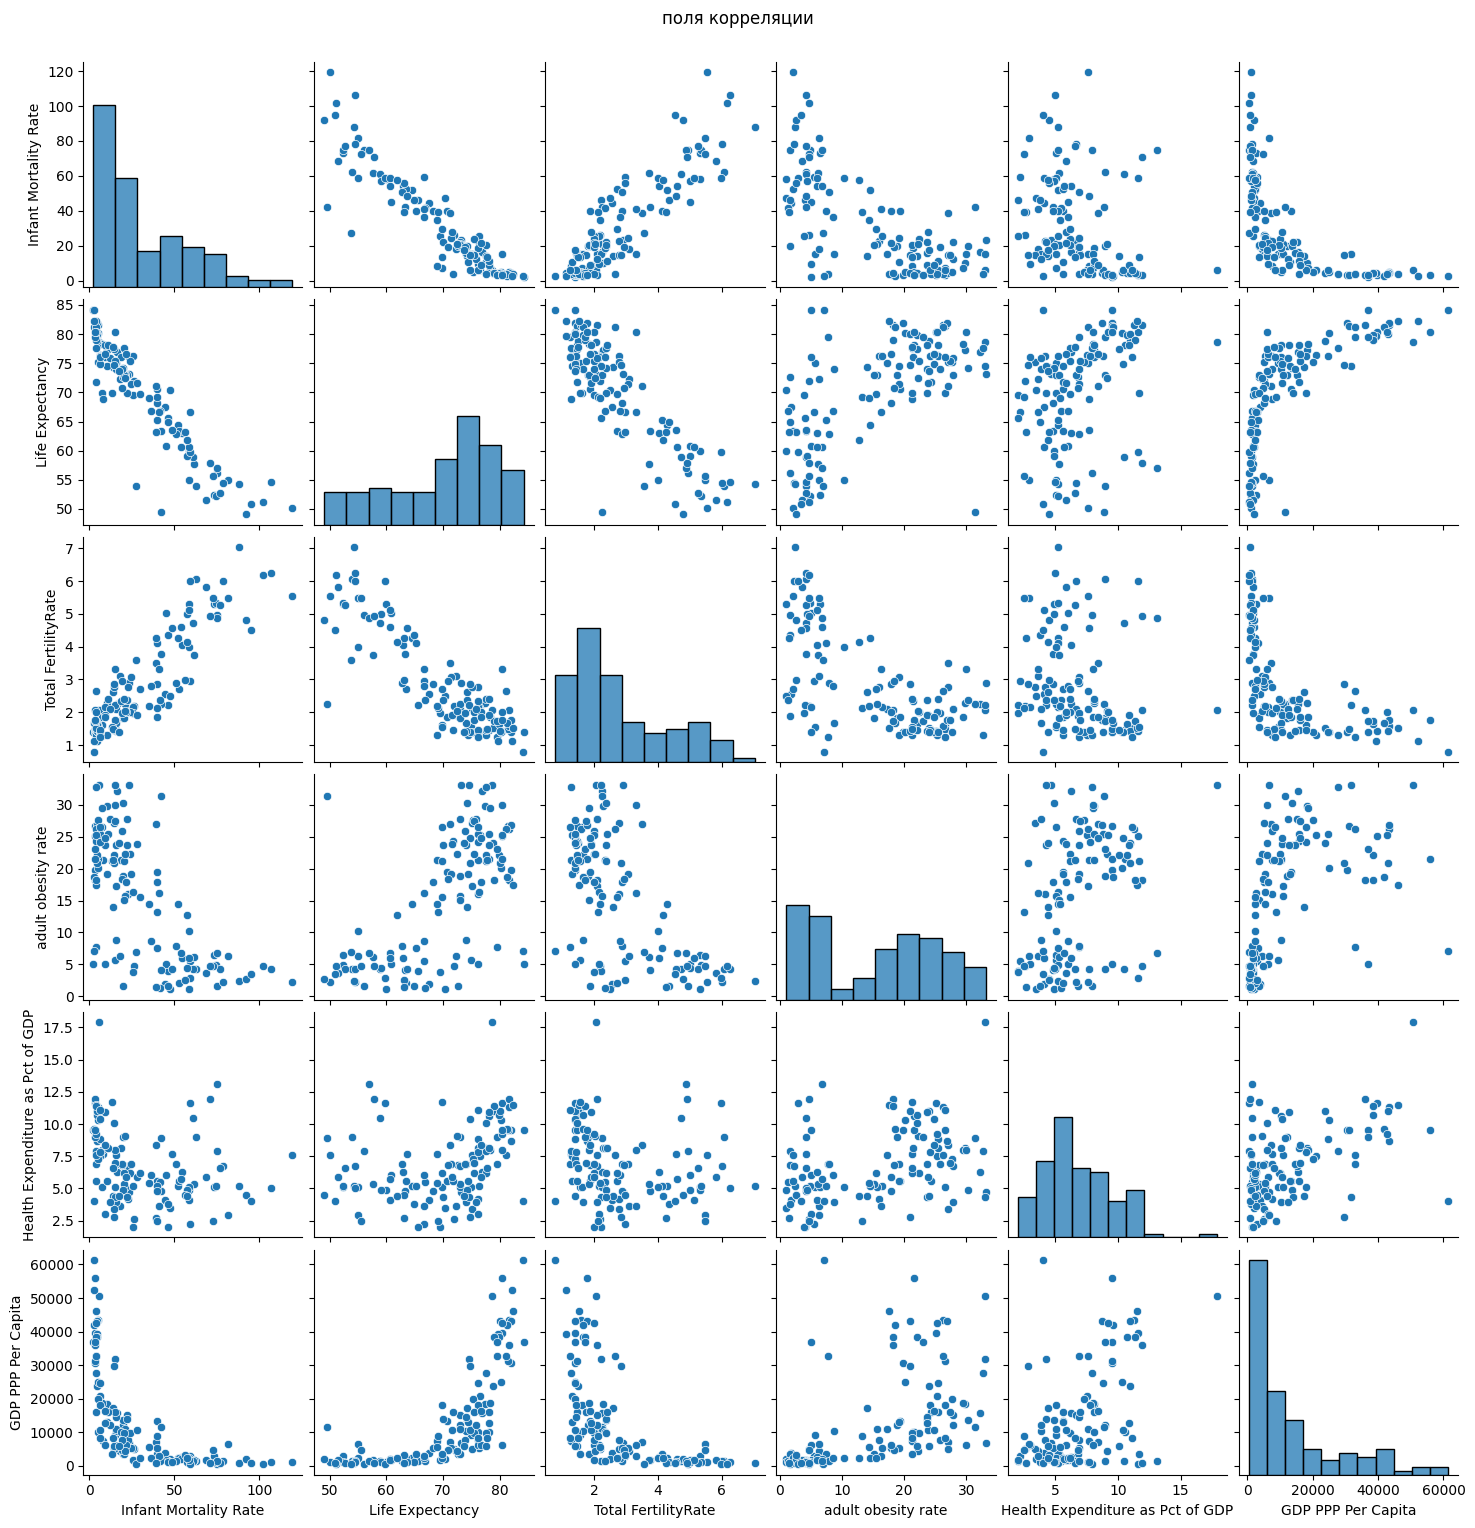

In [ ]:
pair_plot_columns = ['Infant Mortality Rate','Life Expectancy', 'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP','GDP PPP Per Capita']

# Создание графиков рассеяния
sns.pairplot(csv_data[pair_plot_columns])

plt.suptitle('поля корреляции', y=1.02)  # небольшой отступ сверху для заголовка
plt.show()

# c. Построение и интерпретация матрицы парных коэффициентов корреляции (до удаления аномальных наблюдений).

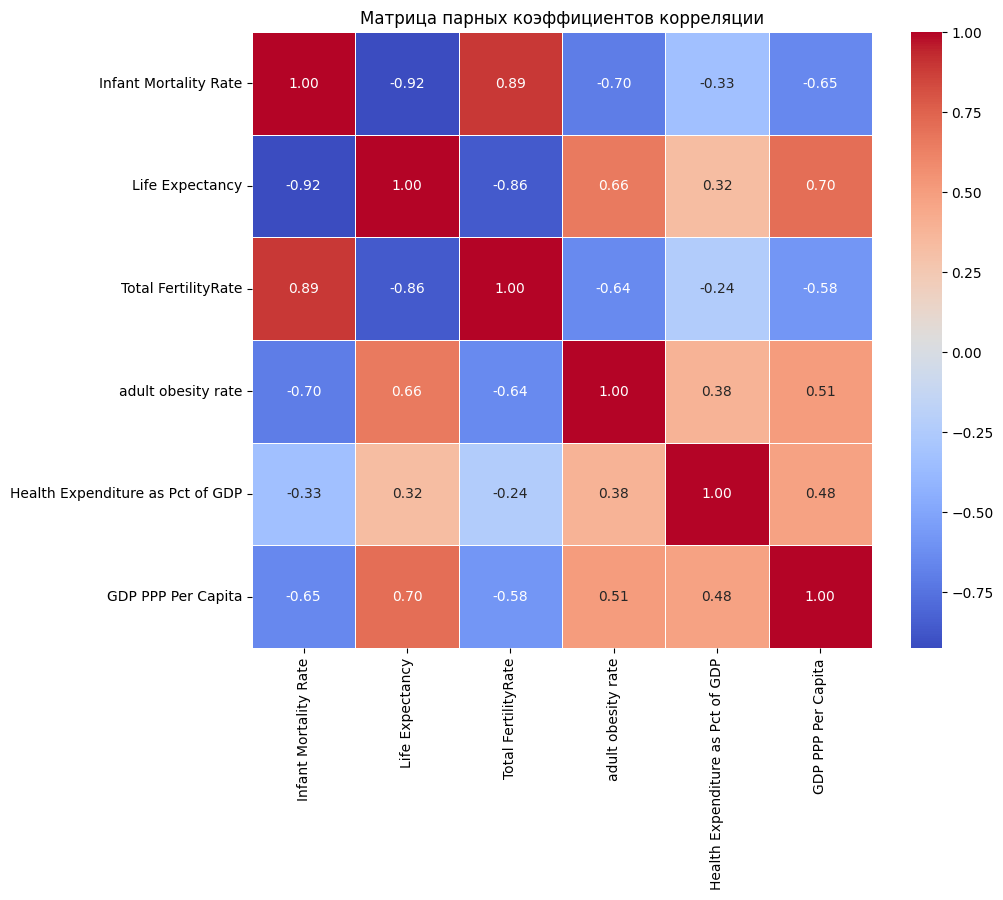

In [ ]:
selected_for_correlation = [
    'Infant Mortality Rate',
    'Life Expectancy',
    'Total FertilityRate',
    'adult obesity rate',
    'Health Expenditure as Pct of GDP',
    'GDP PPP Per Capita'
]
# Преобразование переменной "ВВП на душу населения по ППС" в числовой формат
# Замена запятых на точки и преобразование в тип float
csv_data['Infant Mortality Rate'] = csv_data['Infant Mortality Rate'].replace(',', '.').astype(float)

csv_data['GDP PPP Per Capita'] = csv_data['GDP PPP Per Capita'].replace(' ', '').replace('$', '').astype(float)




correlation_matrix = csv_data[selected_for_correlation].corr()

# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица парных коэффициентов корреляции')
plt.show()

# e. Построение и интерпретация матрицы парных коэффициентов корреляции после удаления аномальных наблюдений. Сопоставление коэффициентов корреляции ДО и ПОСЛЕ удаления аномальных наблюдений.

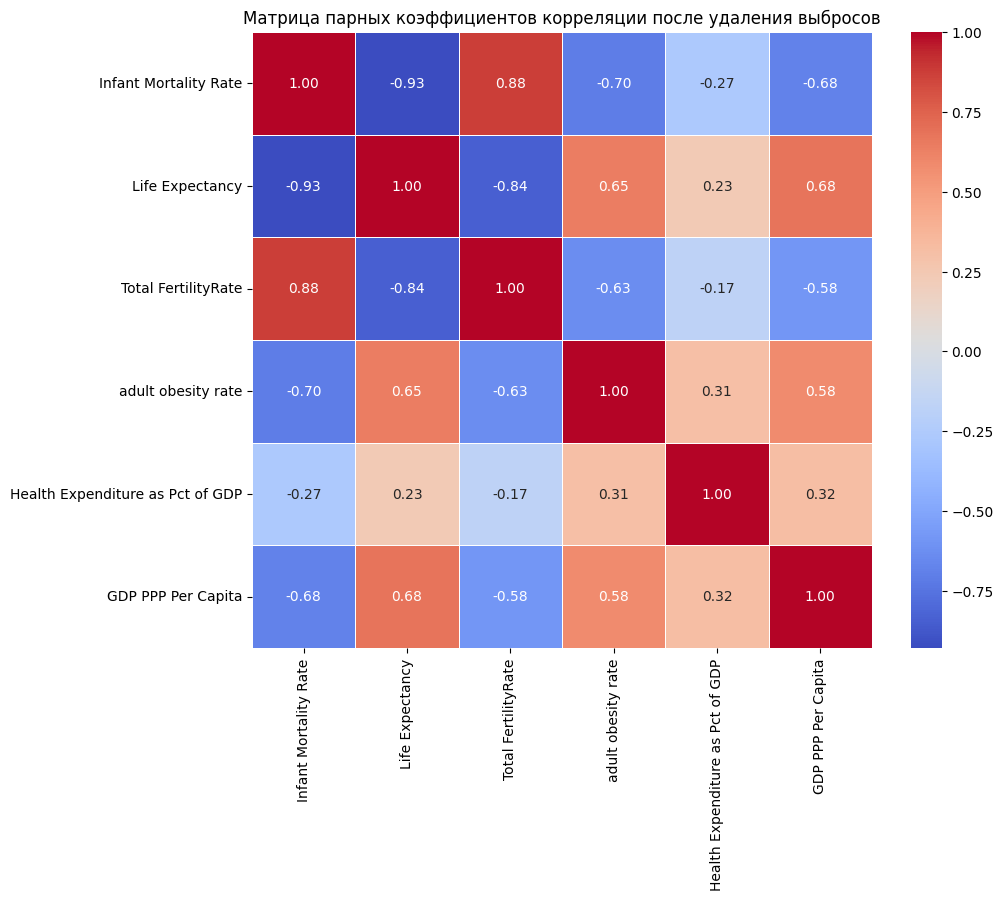

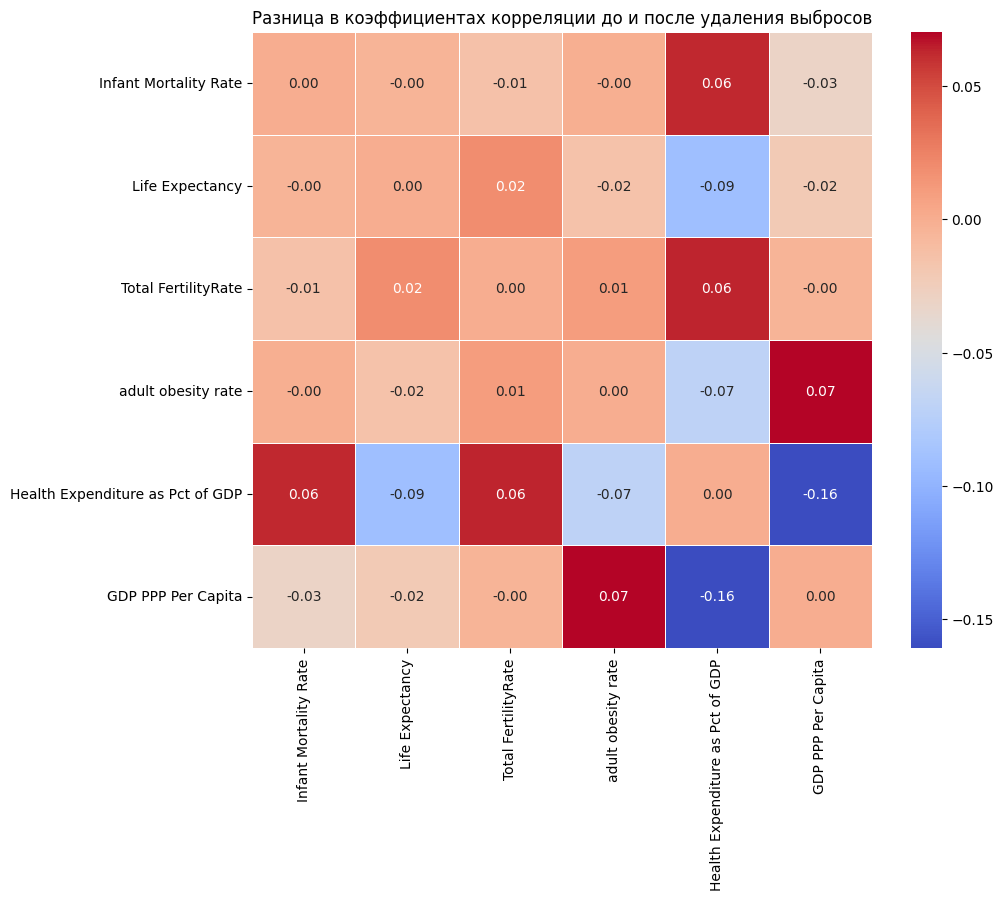

In [ ]:
# Идентификация и удаление выбросов с помощью IQR

# Копия датасета для манипуляций без выбросов
data_no_outliers = csv_data.copy()

for col in selected_for_correlation:
    Q1 = data_no_outliers[col].quantile(0.25)
    Q3 = data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data_no_outliers[(data_no_outliers[col] >= lower_bound) & (data_no_outliers[col] <= upper_bound)]

# Построение матрицы парных коэффициентов корреляции после удаления выбросов
correlation_matrix_no_outliers = data_no_outliers[selected_for_correlation].corr()

# Визуализация матрицы корреляции после удаления выбросов
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица парных коэффициентов корреляции после удаления выбросов')
plt.show()

# Сравнение с исходной матрицей корреляции
correlation_matrix_difference = correlation_matrix_no_outliers - correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_difference, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Разница в коэффициентах корреляции до и после удаления выбросов')
plt.show()

# d.Построение поля корреляции для исследования связи между переменными ПОСЛЕ удаления выбросов. Описание результатов (что изменилось).

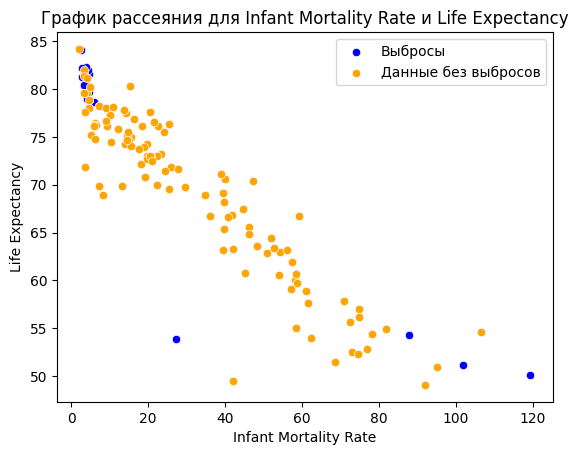

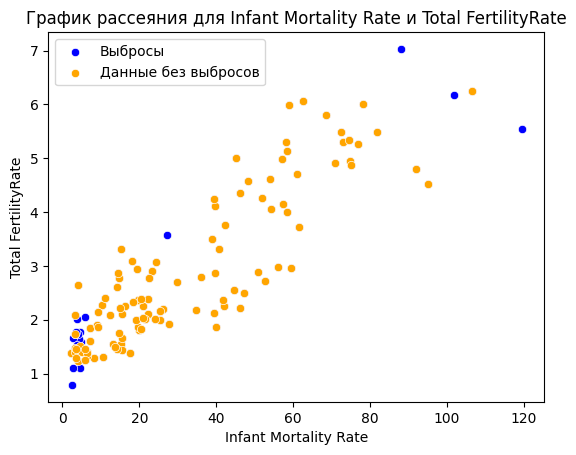

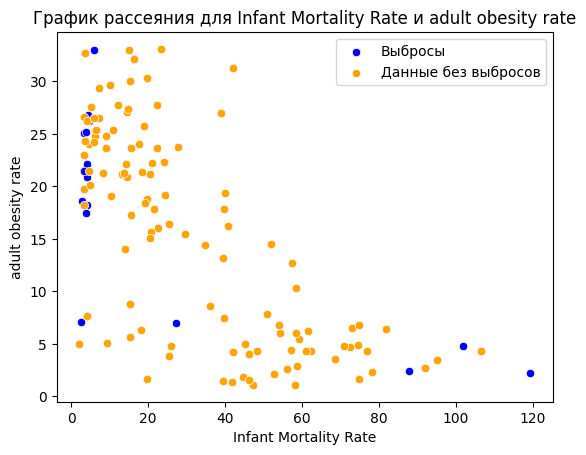

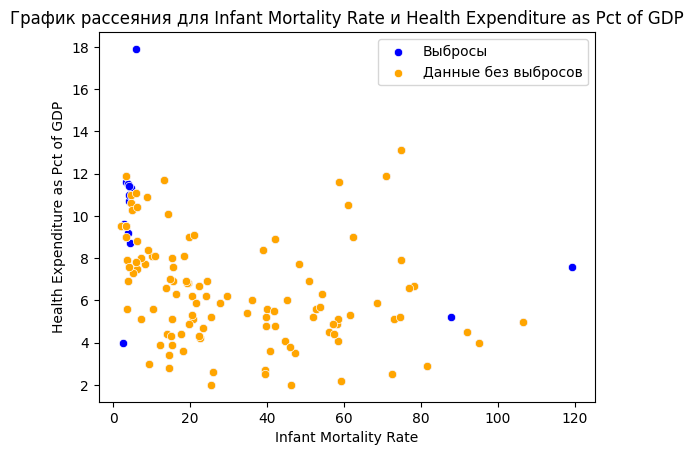

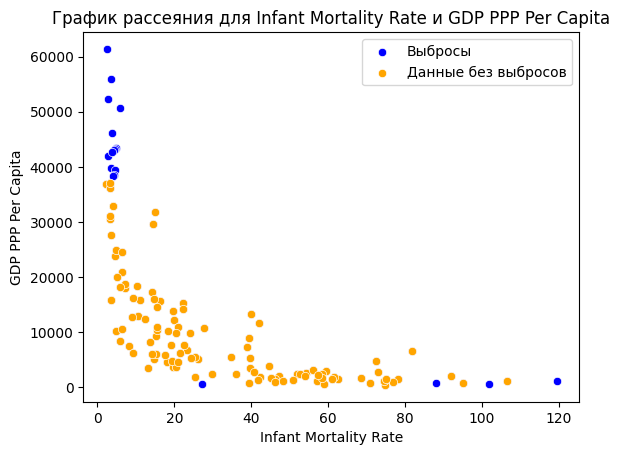

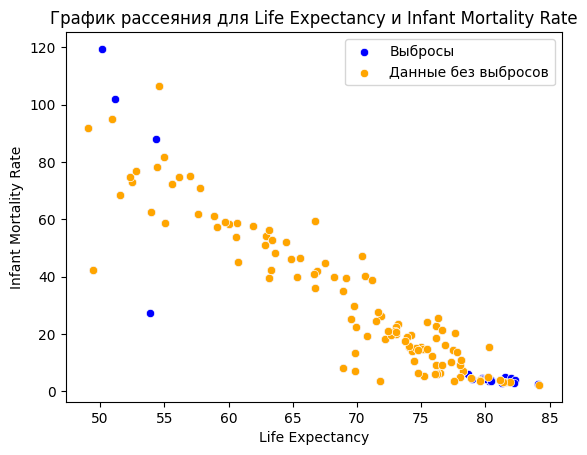

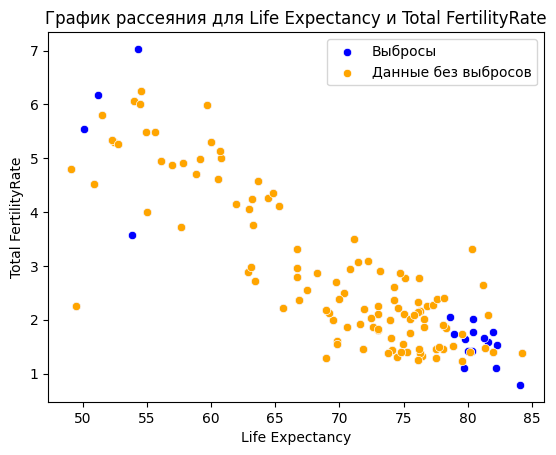

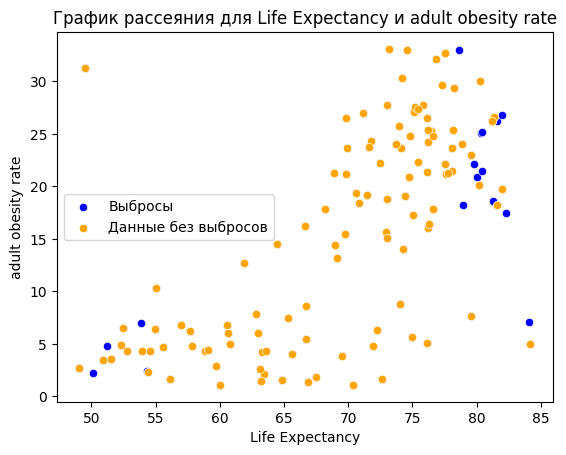

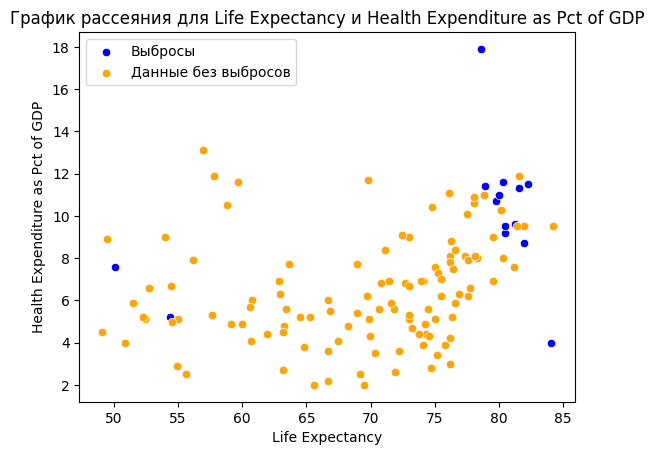

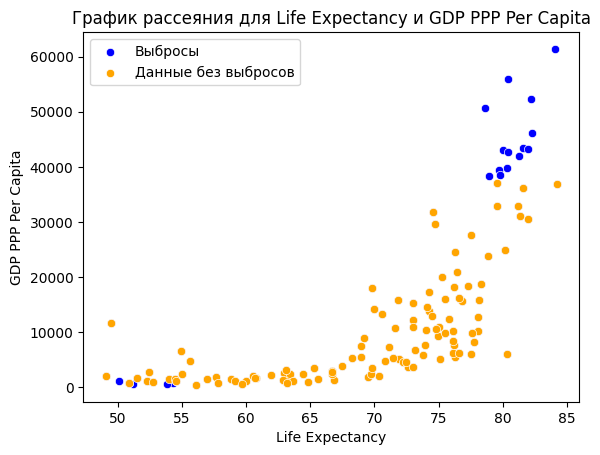

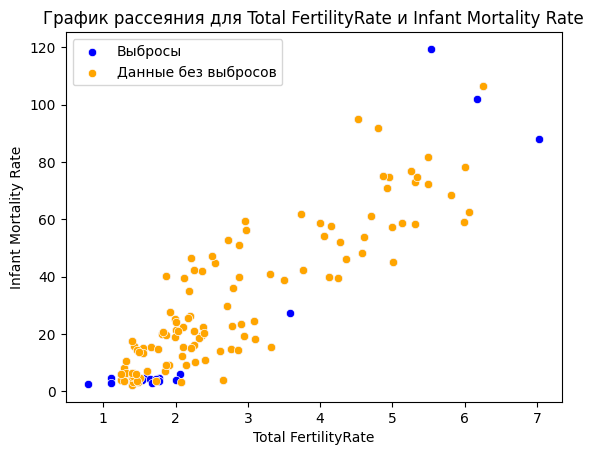

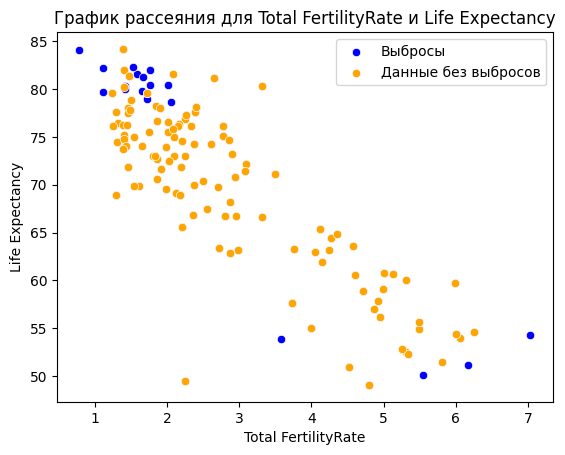

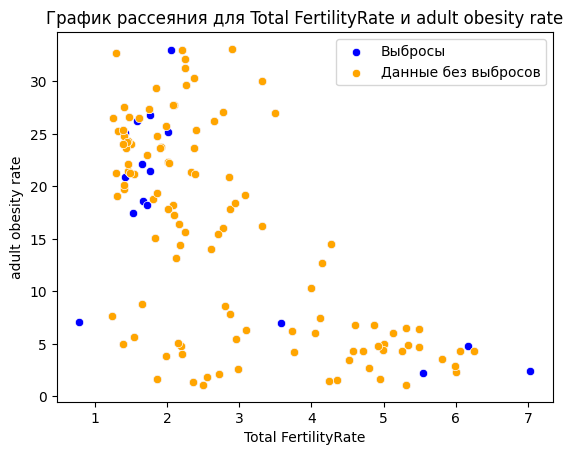

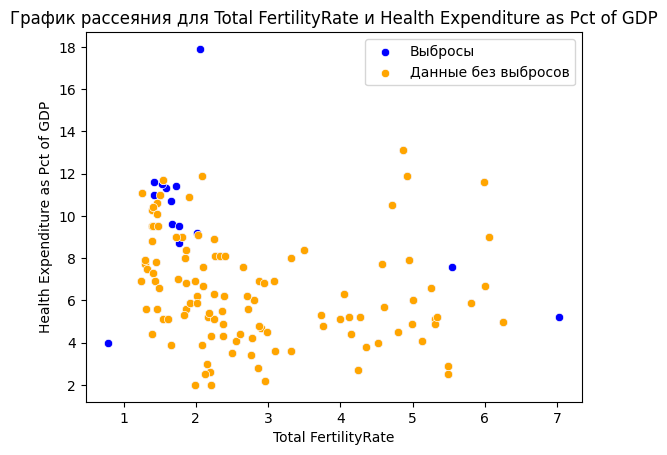

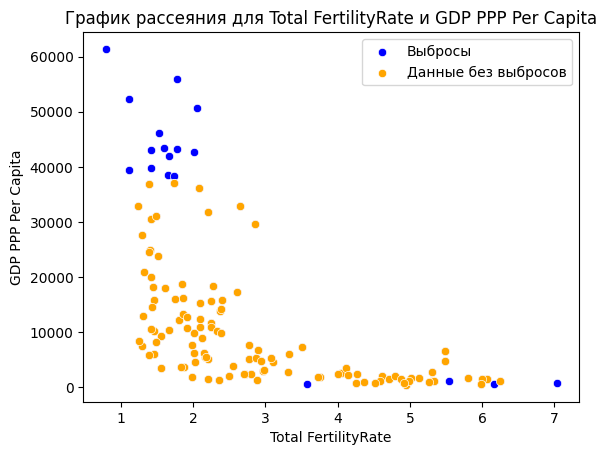

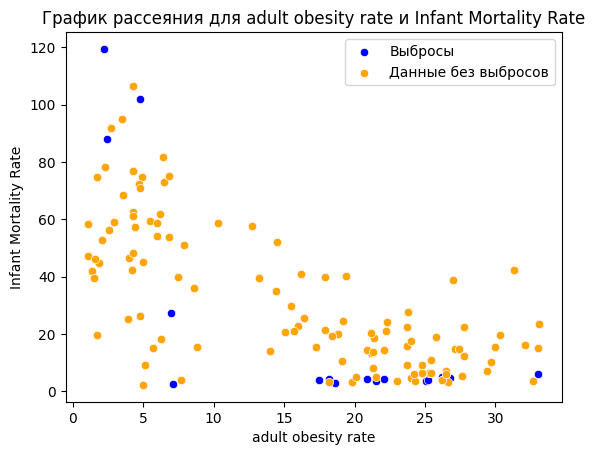

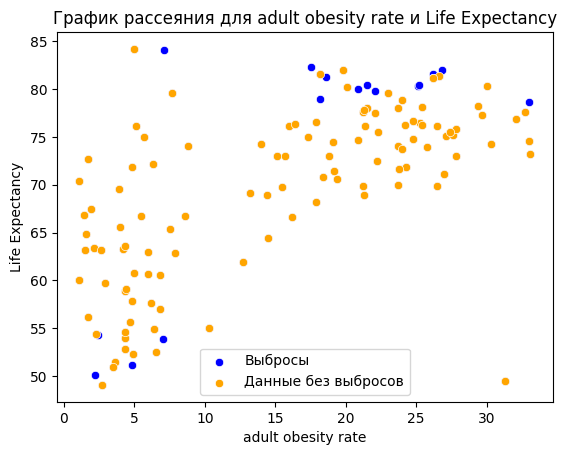

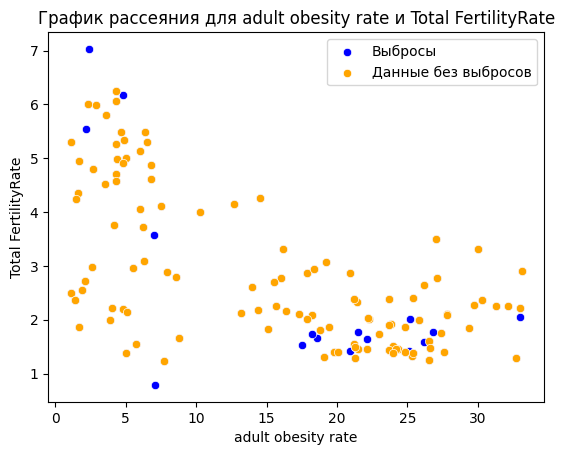

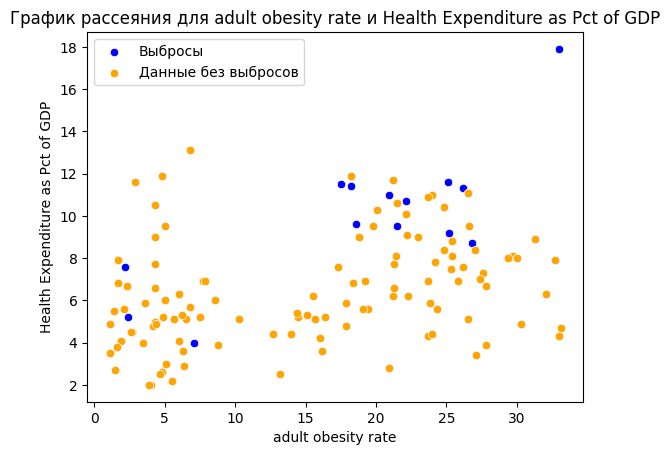

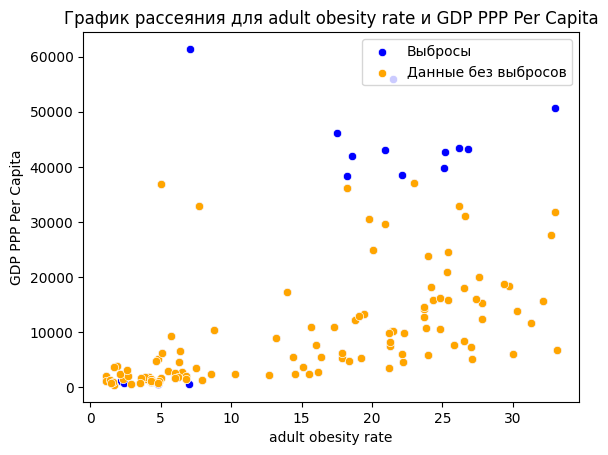

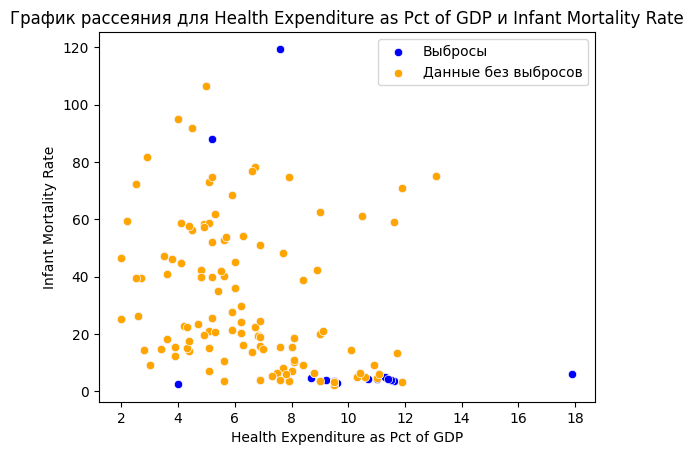

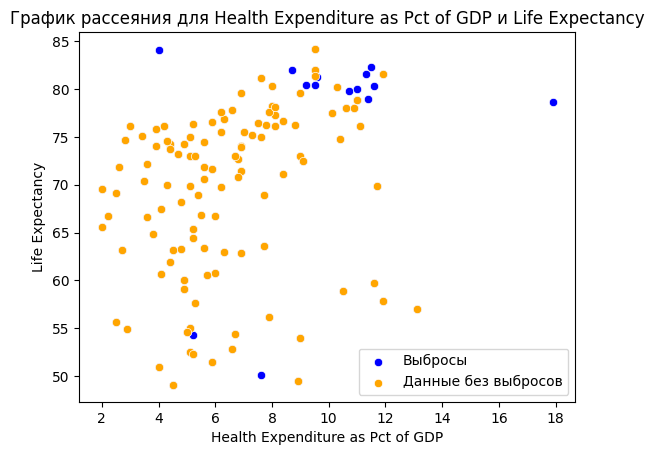

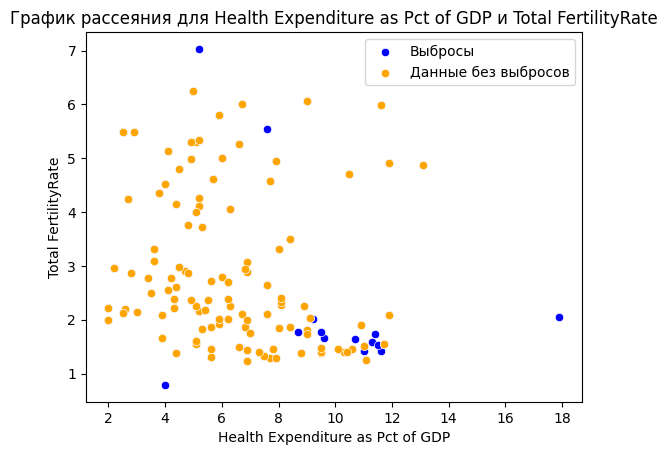

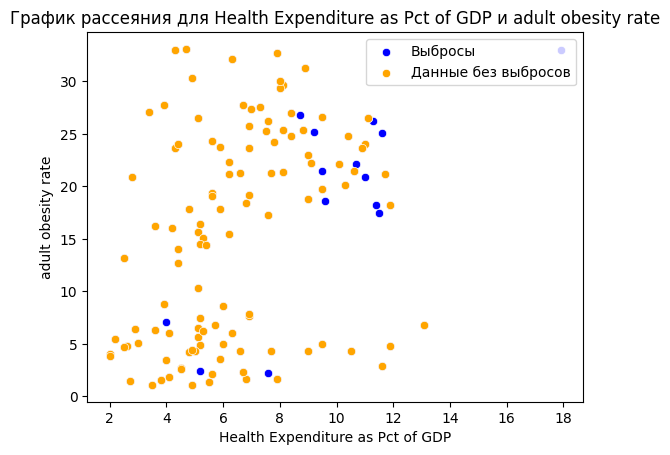

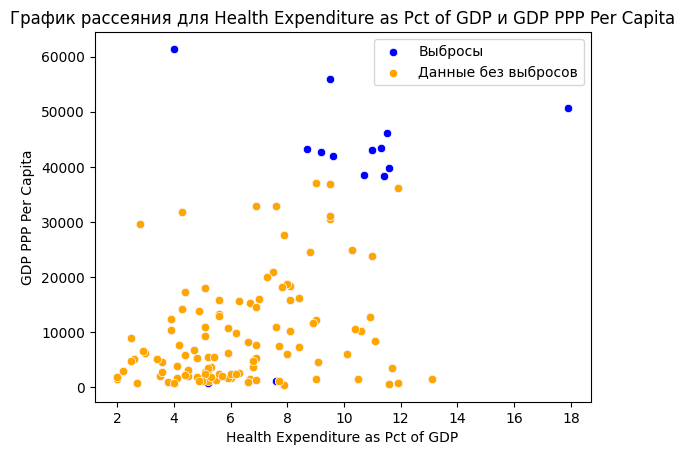

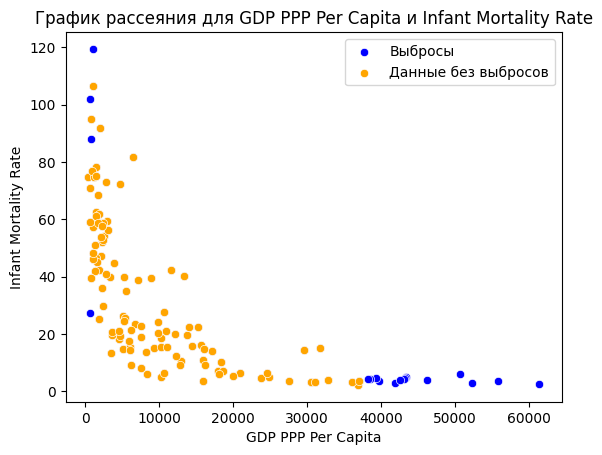

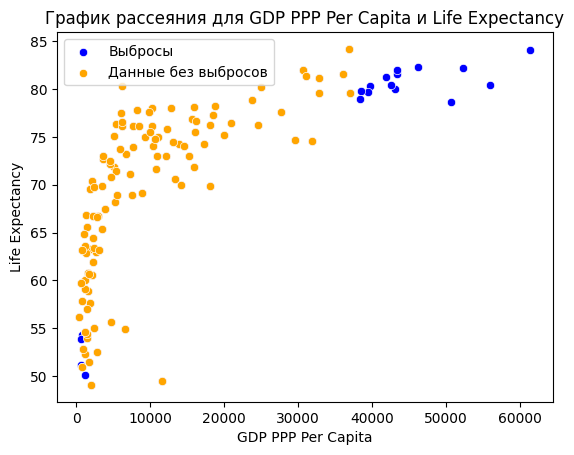

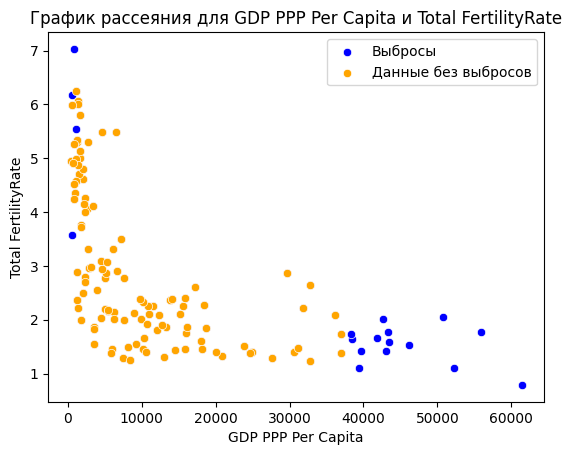

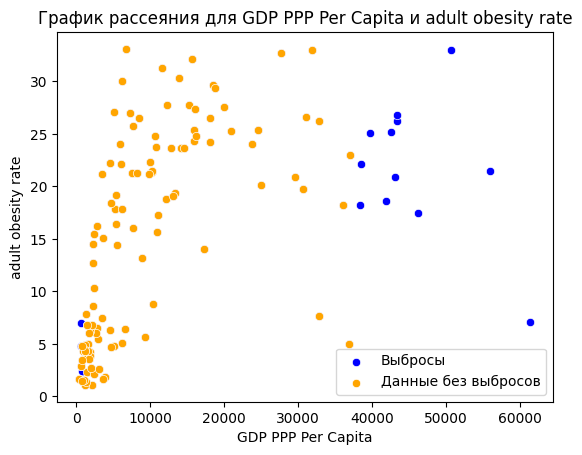

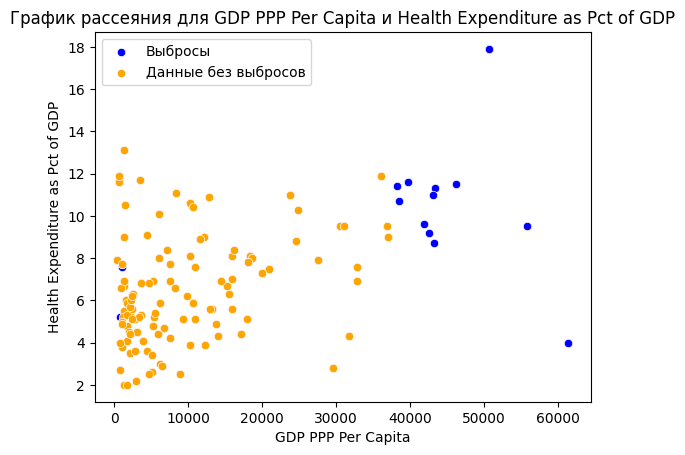

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_plot_columns = ['Infant Mortality Rate', 'Life Expectancy', 'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP', 'GDP PPP Per Capita']

# Создание графиков рассеяния для всех комбинаций переменных
for i, column1 in enumerate(pair_plot_columns):
    for j, column2 in enumerate(pair_plot_columns):
        if i != j:  # Чтобы не строить графики для одинаковых переменных
            plt.figure()
            sns.scatterplot(x=column1, y=column2, data=csv_data, color='blue', label='Выбросы')
            sns.scatterplot(x=column1, y=column2, data=data_no_outliers, color='orange', label='Данные без выбросов')

            plt.title(f'График рассеяния для {column1} и {column2}')
            plt.legend()  # Добавляем легенду
            plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Удаление строк с пропущенными значениями
data_clean = csv_data.dropna(subset=pair_plot_columns)





In [ ]:
!pip install pingouin

In [ ]:

import pingouin as pg

numeric_columns = ['Infant Mortality Rate', 'Life Expectancy', 'Total FertilityRate',
                   'adult obesity rate', 'Health Expenditure as Pct of GDP', 'GDP PPP Per Capita']
# Конвертация столбцов в числовые значения

data_clean[numeric_columns] = data_clean[numeric_columns].replace(',', '.', regex=True).astype(float)

# Обработка отсутствующих значений, если они есть
data_clean = data_clean.dropna().copy()  # Убедитесь, что операция создает копию

# Создание списка для хранения частных корреляций для каждой пары переменных
partial_correlations_list = []

# Цикл для расчета частных корреляций между каждой парой переменных
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        x = numeric_columns[i]
        y = numeric_columns[j]
        covar = [col for col in numeric_columns if col != x and col != y]

        # Расчет частной корреляции для текущей пары переменных
        partial_corr = pg.partial_corr(data=data_clean, x=x, y=y, covar=covar)

        # Добавление результата в список
        partial_correlations_list.append((x, y, partial_corr))

# Вывод частных корреляций для каждой пары переменных
for x, y, partial_corr in partial_correlations_list:
    print(f"Частная корреляция между {x} и {y}:")
    print(partial_corr)
    print()

Частная корреляция между Infant Mortality Rate и Life Expectancy:
           n         r           CI95%         p-val
pearson  127 -0.664492  [-0.75, -0.55]  5.313683e-17

Частная корреляция между Infant Mortality Rate и Total FertilityRate:
           n         r         CI95%         p-val
pearson  127  0.445611  [0.29, 0.58]  2.406201e-07

Частная корреляция между Infant Mortality Rate и adult obesity rate:
           n         r          CI95%     p-val
pearson  127 -0.269093  [-0.43, -0.1]  0.002616

Частная корреляция между Infant Mortality Rate и Health Expenditure as Pct of GDP:
           n         r          CI95%     p-val
pearson  127 -0.065957  [-0.24, 0.11]  0.468563

Частная корреляция между Infant Mortality Rate и GDP PPP Per Capita:
           n         r          CI95%     p-val
pearson  127  0.001394  [-0.18, 0.18]  0.987789

Частная корреляция между Life Expectancy и Total FertilityRate:
           n         r         CI95%     p-val
pearson  127 -0.174635  [-0.34,

<ipython-input-210-419622c83ec1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[numeric_columns] = data_clean[numeric_columns].replace(',', '.', regex=True).astype(float)


# g. Построение и интерпретация матрицы частных коэффициентов корреляции

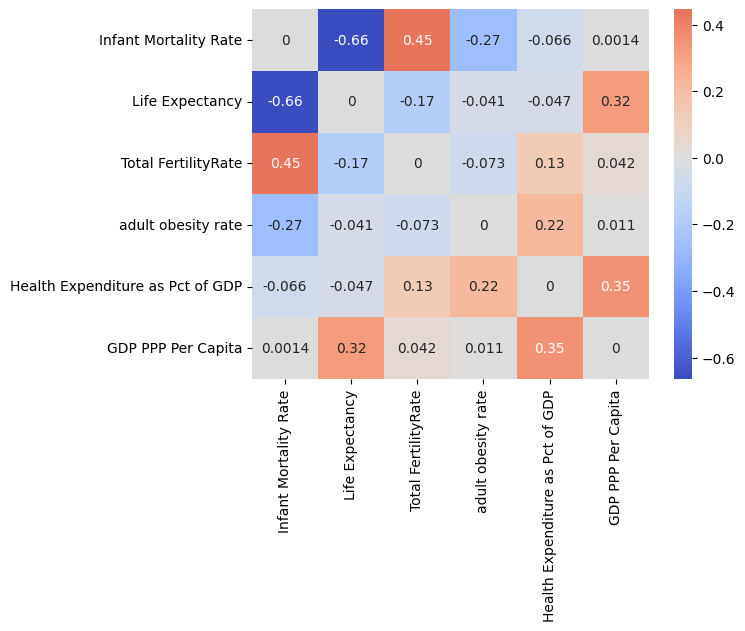

In [ ]:
import numpy as np
partial_corr_matrix = np.zeros((len(numeric_columns), len(numeric_columns)))

# Заполнение матрицы результатами
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        x = numeric_columns[i]
        y = numeric_columns[j]
        covar = [col for col in numeric_columns if col != x and col != y]

        # Предположим, что функция pg.partial_corr возвращает значение коэффициента в столбце 'r'
        partial_corr = pg.partial_corr(data=data_clean, x=x, y=y, covar=covar).r.iloc[0]

        # Заполнение ячеек матрицы
        partial_corr_matrix[i, j] = partial_corr
        partial_corr_matrix[j, i] = partial_corr

# Преобразование матрицы в DataFrame для лучшей визуализации
partial_corr_df = pd.DataFrame(partial_corr_matrix, index=numeric_columns, columns=numeric_columns)

# Визуализация частной корреляционной матрицы
sns.heatmap(partial_corr_df, annot=True, cmap='coolwarm', center=0)
plt.show()

# i. Расчет множественного коэффициента корреляции

In [ ]:
import numpy as np

# Выбор переменных для X (независимые переменные) и y (зависимая переменная)
X = csv_data[['GDP PPP Per Capita', 'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP']]
y = csv_data['Infant Mortality Rate']

# Вычисление множественного коэффициента корреляции
multiple_correlation_coefficient = np.corrcoef(X, y, rowvar=False)[0][-1]

multiple_correlation_coefficient



-0.6489343952722414

# 3.«Кластерный анализ»:


In [ ]:
# Загрузка данных
data_path = '/content/ПСА_исслед_Tota.csv'
data_analysis = pd.read_csv(data_path, delimiter=';')

# Выбор столбцов для анализа
columns_for_analysis = ['Maternal Mortality Rate', 'Infant Mortality Rate', 'Life Expectancy',
                        'Total FertilityRate', 'adult obesity rate', 'Health Expenditure as Pct of GDP']

# Фильтрация данных для анализа
data_filtered = data_analysis[columns_for_analysis]

# Замена запятых на точки и преобразование типов данных для числовых столбцов
data_filtered = data_filtered.replace({',': '.'}, regex=True)
for col in columns_for_analysis:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Удаление строк с отсутствующими данными
data_filtered.dropna(inplace=True)

# Стандартизация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Проверка результатов предварительной обработки
data_scaled[:5]  # Вывод первых пяти строк стандартизированных данных для проверки


array([[-0.63874697, -0.57741683,  0.53637332, -0.86764653, -1.00745047,
        -0.60539112],
       [ 0.06819812,  0.53266054, -0.28875052, -0.17418455, -1.39237296,
        -0.96199907],
       [-0.70814035, -0.92856376,  0.93520148, -0.51398092,  1.75791373,
         3.95919055],
       [ 0.15493985, -0.16736784,  0.19687496, -0.41689624, -1.09861632,
        -1.49691098],
       [-0.55634233, -0.40259853,  0.31992938, -0.68734641,  0.31951917,
         0.78537986]])

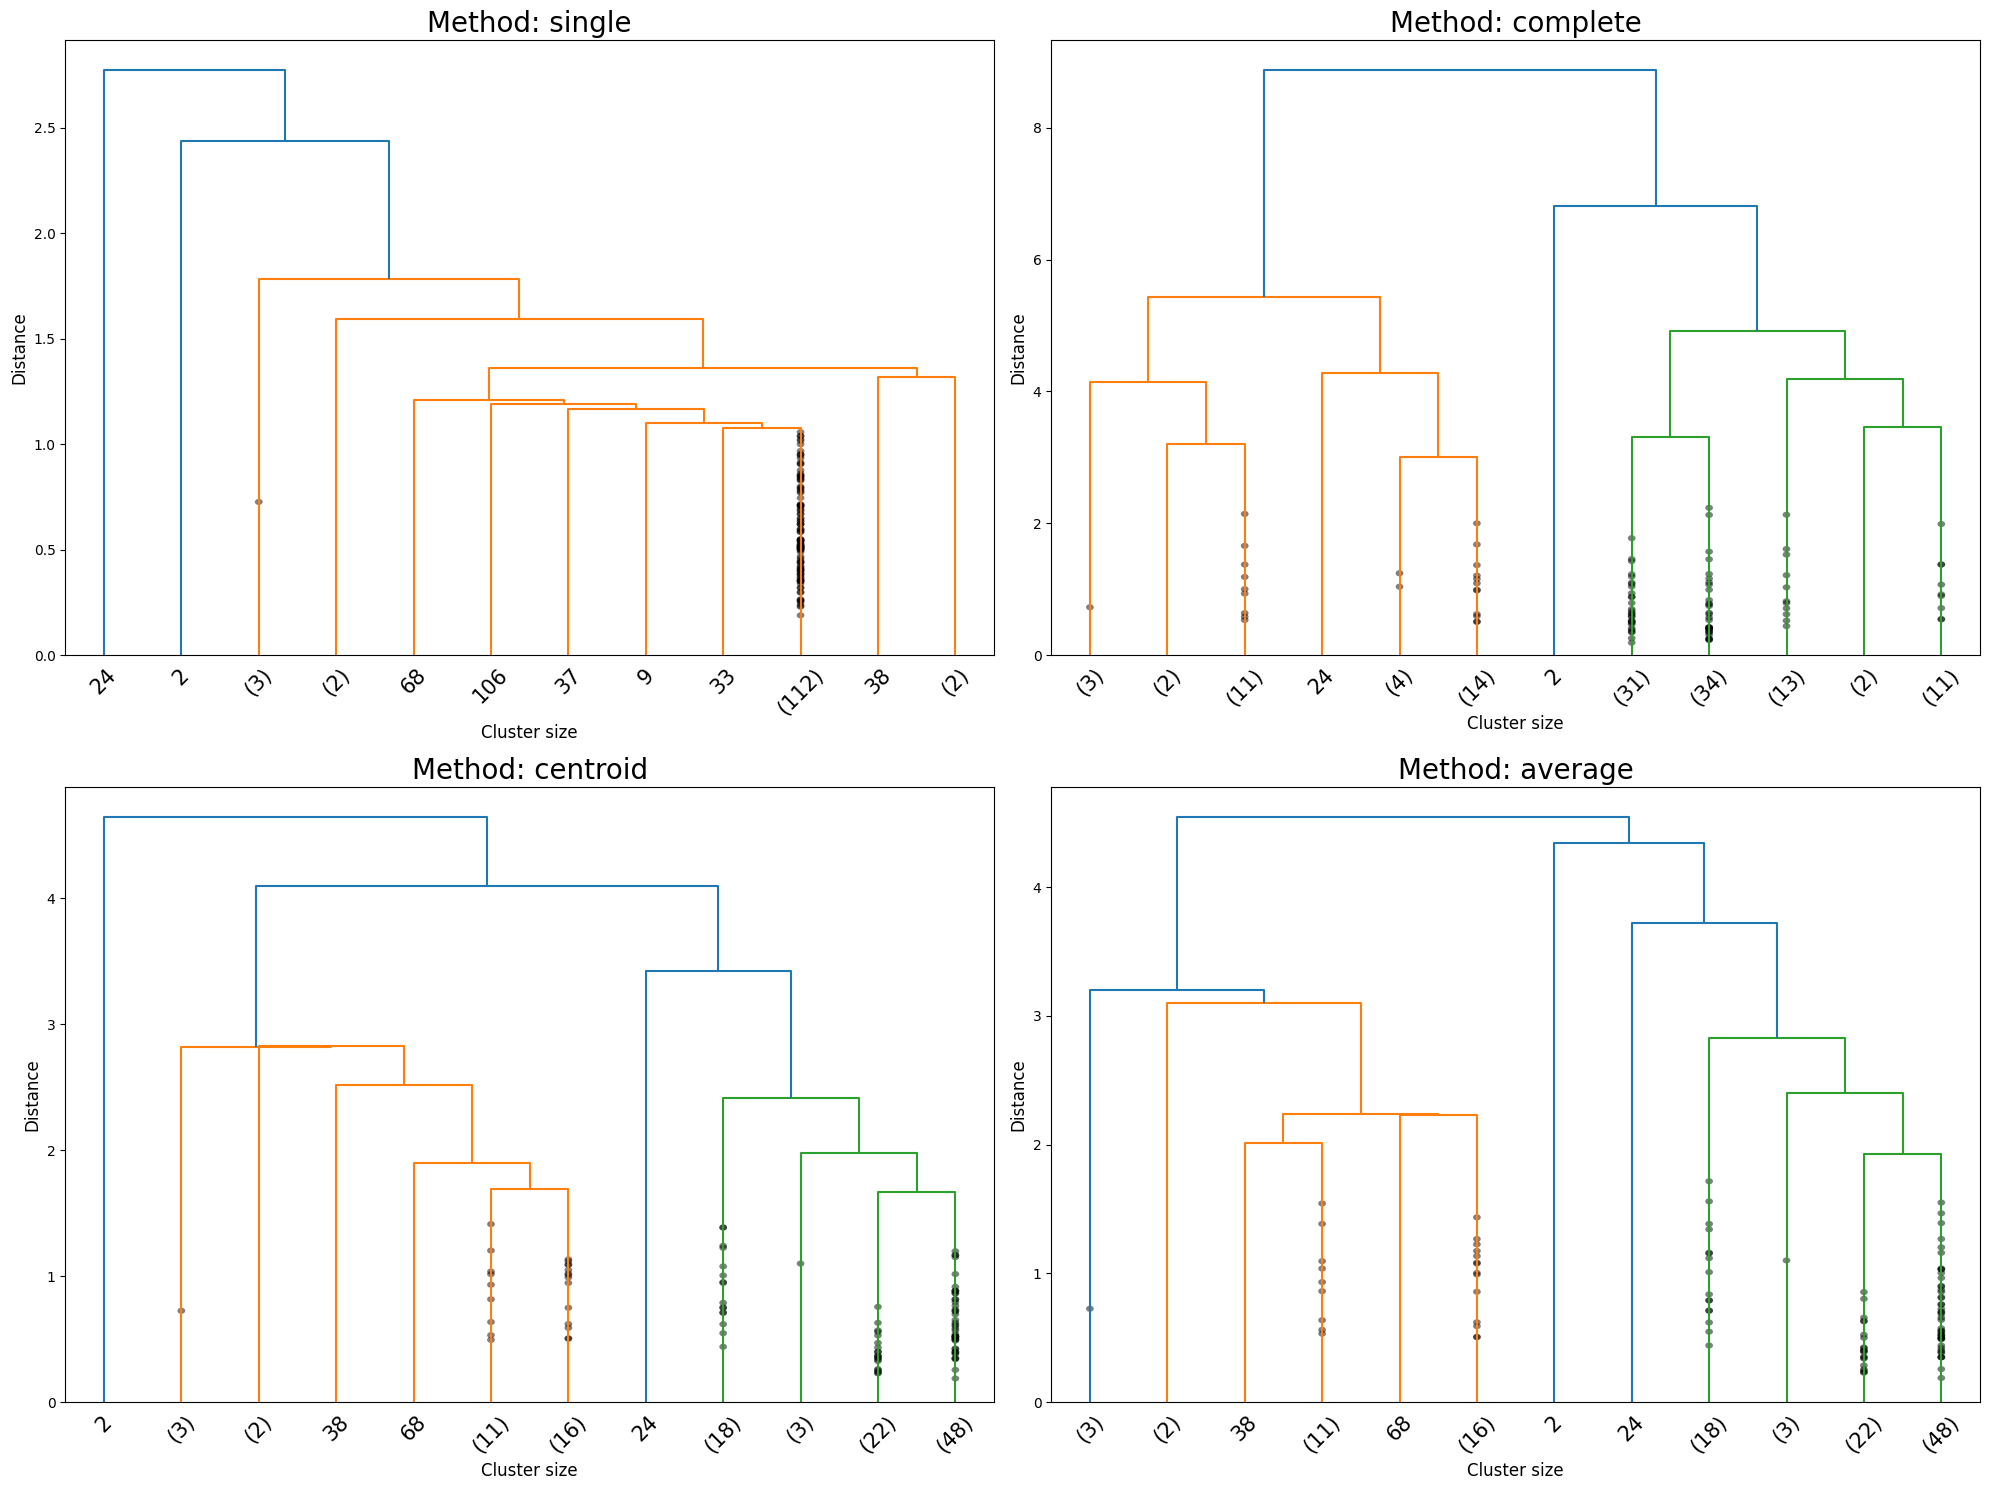

In [ ]:
# Определение методов связывания для построения дендрограмм
linkage_methods = ['single', 'complete', 'centroid', 'average']

# Построение дендрограмм для каждого метода
plt.figure(figsize=(20, 15))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(data_scaled, method=method)
    dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
    plt.title(f'Method: {method}', fontsize=20)
    plt.xlabel('Cluster size', fontsize=12)
    plt.ylabel('Distance', fontsize=12)

plt.tight_layout()
plt.show()


# Применение метода k-средних для классификации объектов


In [ ]:
# Применение метода k-средних для 4 кластеров
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Добавление меток кластеров к исходным данным
data_filtered['Cluster'] = kmeans.labels_

# Вычисление средних значений по кластерам для всех показателей
cluster_means = data_filtered.groupby('Cluster').mean()

cluster_means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Maternal Mortality Rate,Infant Mortality Rate,Life Expectancy,Total FertilityRate,adult obesity rate,Health Expenditure as Pct of GDP
Cluster,,,,,,
0,68.609756,19.702439,73.314146,2.114146,21.041463,5.709756
1,547.500000,70.812500,56.382500,5.139286,4.835714,6.414286
2,23.621622,6.721892,78.558108,1.721892,23.602703,9.824324
3,208.857143,39.681429,67.261429,2.926667,5.504762,4.100000


Кластер 1.0 (Количество стран: 41):
China, Russia, Mexico, Egypt, Turkey, Iran, Thailand, Korea, South, South Africa, Colombia, Ukraine, Algeria, Morocco, Iraq, Peru, Malaysia, Uzbekistan, Venezuela, Saudi Arabia, Syria, Romania, Kazakhstan, Ecuador, Guatemala, Tunisia, Bolivia, Dominican Republic, Belarus, Azerbaijan, Honduras, Bulgaria, Paraguay, El Salvador, Libya, Kyrgyzstan, Singapore, Lebanon, Mongolia, Oman, Albania, Armenia


Кластер 2.0 (Количество стран: 28):
Nigeria, Ethiopia, Congo, Democratic Republic of the, Tanzania, Sudan, Uganda, Afghanistan, Mozambique, Cote d'Ivoire, Cameroon, Angola, Burkina Faso, Niger, Malawi, Mali, Zambia, Senegal, Rwanda, Chad, Guinea, Burundi, Benin, Togo, Sierra Leone, Central African Republic, Congo, Republic of the, Liberia, Mauritania


Кластер 3.0 (Количество стран: 37):
United States, Brazil, Japan, Germany, France, Italy, Spain, Argentina, Poland, Canada, Australia, Chile, Cuba, Portugal, Greece, Belgium, Czech Republic, Hungary, Sweden,

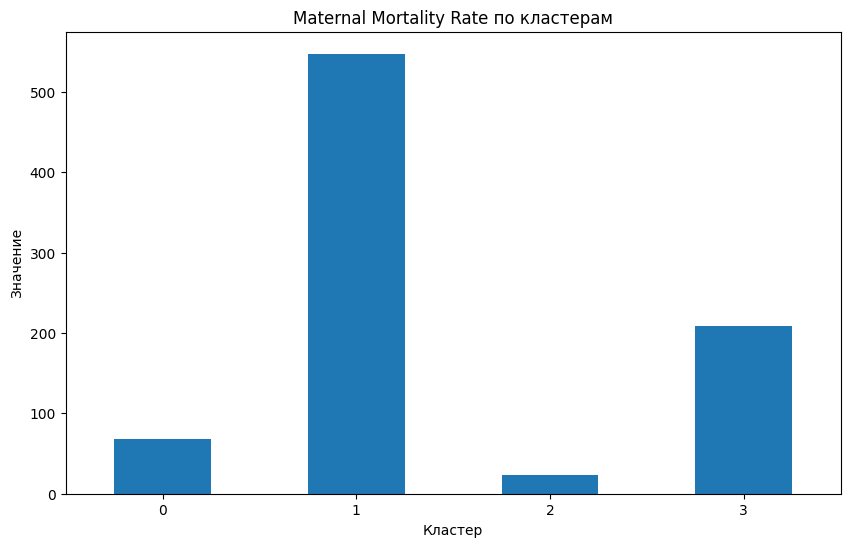

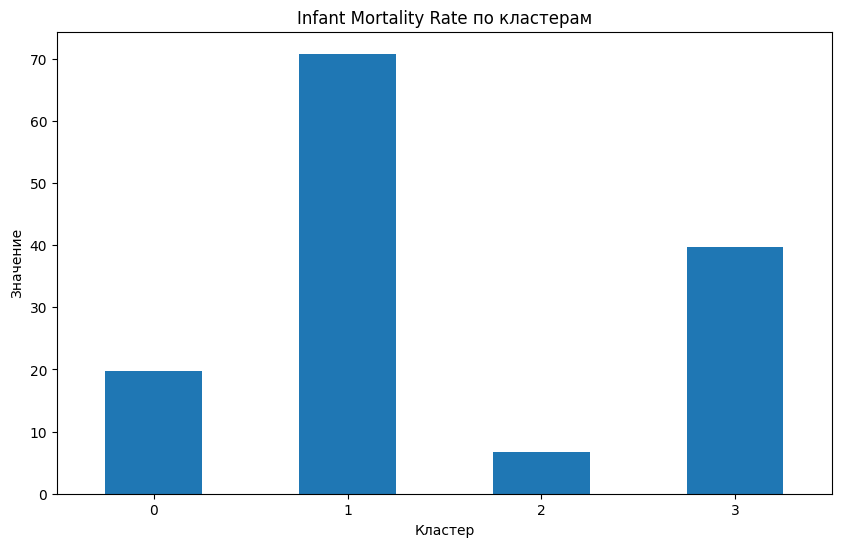

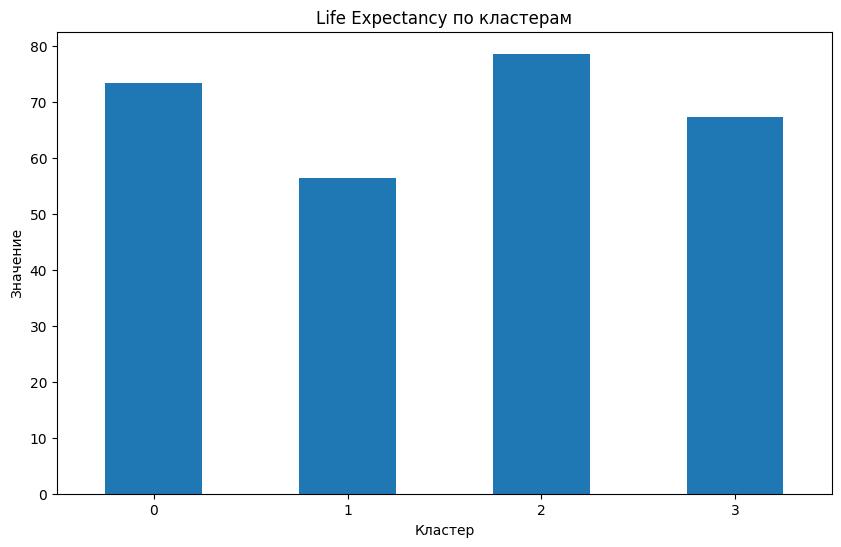

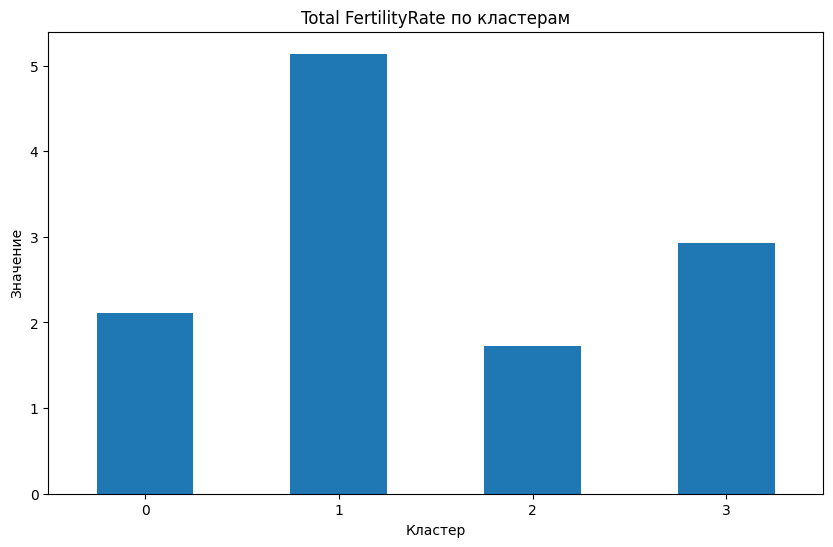

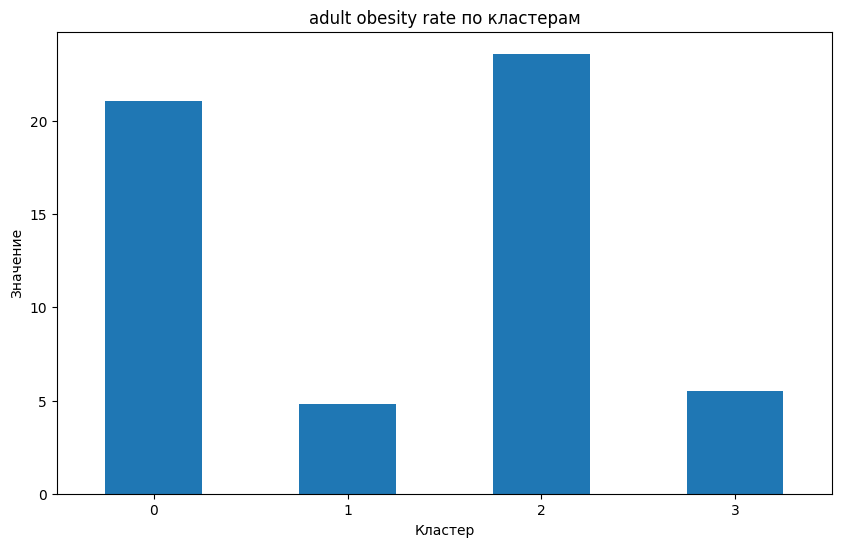

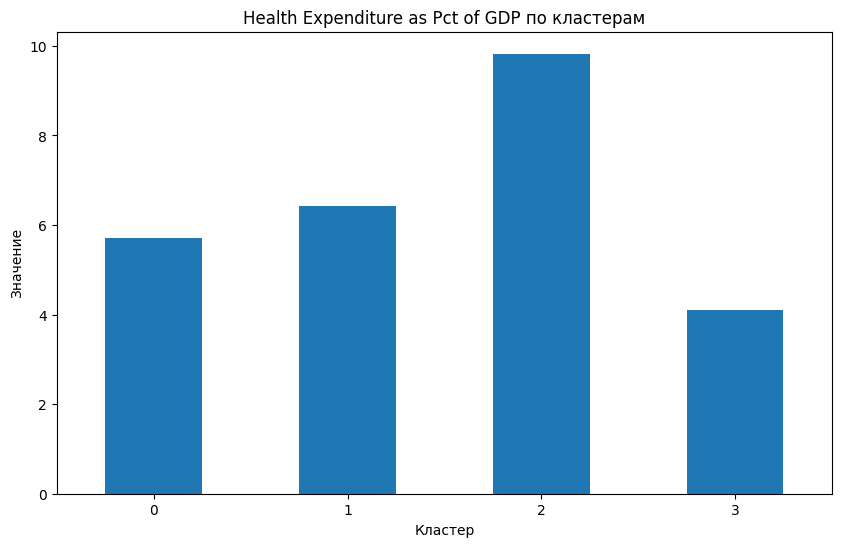

In [ ]:
# Вывод всех стран по кластерам с корректной нумерацией
data_filtered['Cluster'] += 1  # Корректировка индекса кластеров для соответствия заданию

# Вывод списка стран по кластерам
for cluster, countries in data_analysis.groupby(data_filtered['Cluster'])[country_column_name].apply(list).items():
    print(f"Кластер {cluster} (Количество стран: {len(countries)}):")
    print(', '.join(countries))
    print("\n")

# Перерисовка графиков для каждого показателя
for column in cluster_means.drop(columns=['GDP PPP Per Capita'], errors='ignore').columns:
    plt.figure(figsize=(10, 6))
    cluster_means[column].plot(kind='bar')
    plt.title(f'{column} по кластерам')
    plt.ylabel('Значение')
    plt.xlabel('Кластер')
    plt.xticks(rotation=0)
    plt.show()
